# Support Vector Machines (SVM)

Using SVM to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that the data points can be categorized, even when the data are not otherwise linearly seperable. A seperator between the categories is found, then the data are then transformed in such a way that the seperator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new recoord should belong.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

|Field name|Desscription|
|--- |--- |
|ID|Clump thickiness|
|Clump|Clump thickness|
|Unifsize|Uniformity of cell size|
|Unifshape|Uniformity od cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or Malignant|

In [2]:
cell = pd.read_csv('cell_samples.csv')
cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
cell.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [4]:
cell.nunique()


ID             645
Clump           10
UnifSize        10
UnifShape       10
MargAdh         10
SingEpiSize     10
BareNuc         11
BlandChrom      10
NormNucl        10
Mit              9
Class            2
dtype: int64

In [5]:
cell.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [6]:
cell.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
cell.Clump.unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [9]:
cell.UnifSize.unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

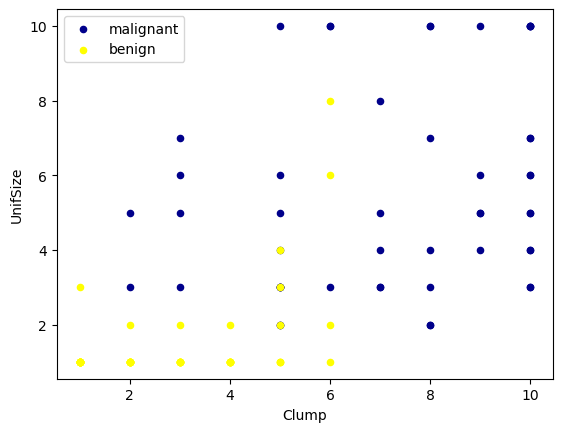

In [10]:
# Checking the distribution of the Classes based on clump thickness and Uniformity of cell size.

ax = cell[cell['Class'] == 4][0:50].plot(kind = 'scatter',
                                         x = 'Clump', y = 'UnifSize', color = 'DarkBlue',
                                         label = 'malignant');
cell[cell['Class'] == 2][0:50].plot(kind = 'scatter',
                                     x = 'Clump', y = 'UnifSize', color = 'Yellow',
                                     label = 'benign', ax = ax);
plt.show()

This distribution suggests that malignant cells generally have higher clump thickness and more variation in cell size, while benign cells tend to have lower clump thickness and more uniform sizes.

In [11]:
# Changing the string column(BareNuc) in a NUmeric column
cell = cell[pd.to_numeric(cell['BareNuc'], errors = 'coerce').notnull()]
cell['BareNuc'] = cell['BareNuc'].astype('int')
cell.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_35684\3292496953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell['BareNuc'] = cell['BareNuc'].astype('int')


In [12]:
feature_df = cell[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

Building a model to predict the value of Class(ie; brnign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [13]:
cell.Class.dtype

dtype('int64')

In [14]:
cell['Class'] = cell['Class'].astype('int')
y = np.asarray(cell['Class'])
y[0:5]

C:\Users\USER\AppData\Local\Temp\ipykernel_16960\51722224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell['Class'] = cell['Class'].astype('int')


array([2, 2, 2, 2, 2])

In [14]:
# Converting the Class column into an array
y = np.asarray(cell['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# Train/Test dataset


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


# Modeling (SVM with Scitkit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for thr transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no way of knowing which function performs best with any given dataset,  we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

Abbreviations:
- clf = classifier model
- yhat = in DS or ML as predicted values or output generated by the model


In [24]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [31]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2], dtype=int64)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    if normalize:
        cm = cmastype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


C:\Users\USER\AppData\Local\Temp\ipykernel_35684\2063992147.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


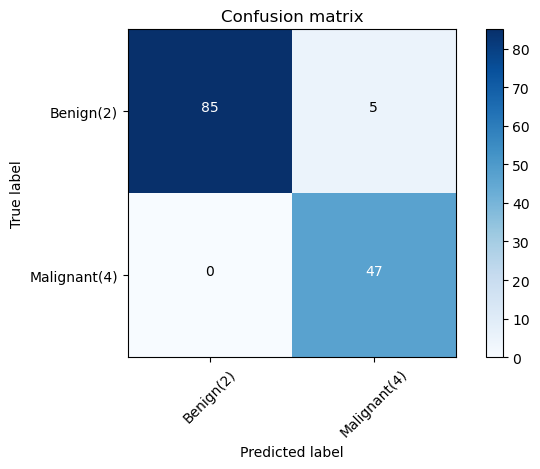

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [2,4])
np.set_printoptions(precision = 2)

print (classification_report(y_test, yhat))

# Plot non-normalised confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title = 'Confusion matrix')

The above results shows that there is a minimal misclassification while the model shows a strong performance with an accuracy of 96% (that is; it correctly predicted the majority of both benign and malignant cases).

In [69]:
from sklearn.metrics  import f1_score
f1_score(y_test, yhat, average = 'weighted')

0.9639038982104676

This tells that 96% of the model was accurrently predicted

In [67]:
# Using the Jaccard_score to check the similarity betwwwn two sets of labels.
# It is also known as the sise of the intersection divided by the size of the union of the two label sets.
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 2)

0.9444444444444444

In [ ]:
This means that Benign is 94% similar to Malignant

In [73]:
jaccard_score(y_test, yhat, pos_label = 4)

0.9038461538461539

In [74]:
jaccard_score(y_test, yhat, average = 'ma cro')

0.9241452991452992